# Importing Packages & Set Up Data Layout

In [18]:
# Let's load some packages we need (pip install mne)
import mne
import mne.viz
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.channels import make_standard_montage
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Read raw data files where each file contains a run
files = ['../datasets/HW2Datasets/Subject06_1.edf', '../datasets/HW2Datasets/Subject06_2.edf', '../datasets/HW2Datasets/Subject07_1.edf', '../datasets/HW2Datasets/Subject07_2.edf']
raws = [read_raw_edf(f, preload=True) for f in files]

# #Combine all loaded runs
# raw_obj = concatenate_raws(raws)

# #Set Standard Channel Locations
# eegbci.standardize(raw_obj) # set channel names

for raw in raws:
    # Rename the raw channels
    raw.rename_channels({'EEG F3':'F3', 'EEG F4':'F4',
                            'EEG Fp1':'Fp1', 'EEG Fp2':'Fp2', 'EEG F7':'F7', 'EEG F8':'F8',
                            'EEG T3':'T3', 'EEG T4':'T4', 'EEG C3':'C3', 'EEG C4':'C4',
                            'EEG T5':'T5', 'EEG T6':'T6', 'EEG P3':'P3', 'EEG P4':'P4',
                            'EEG O1':'O1', 'EEG O2':'O2', 'EEG Fz':'Fz', 'EEG Cz':'Cz',
                            'EEG Pz':'Pz', 'EEG A2-A1':'A2', 'ECG ECG':'ECG'})


    # Set channel types
    raw.set_channel_types({'ECG':'ecg'})

    # Define the channel locations
    raw.set_montage(mne.channels.make_standard_montage('standard_1020'))

# raw_obj = concatenate_raws(raws)

Extracting EDF parameters from e:\Other\Schoo\NeuralDataScience\Neural-Data-Science\datasets\HW2Datasets\Subject06_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from e:\Other\Schoo\NeuralDataScience\Neural-Data-Science\datasets\HW2Datasets\Subject06_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from e:\Other\Schoo\NeuralDataScience\Neural-Data-Science\datasets\HW2Datasets\Subject07_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from e:\Other\Schoo\NeuralDataScience\Neural-Data-Science\datasets\HW2Datasets\Subject07_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Read

# Q1)
## Plot the power spectral density for the two conditions (background and task). Discuss the main difference between the two groups.


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


c:\Users\Wise\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


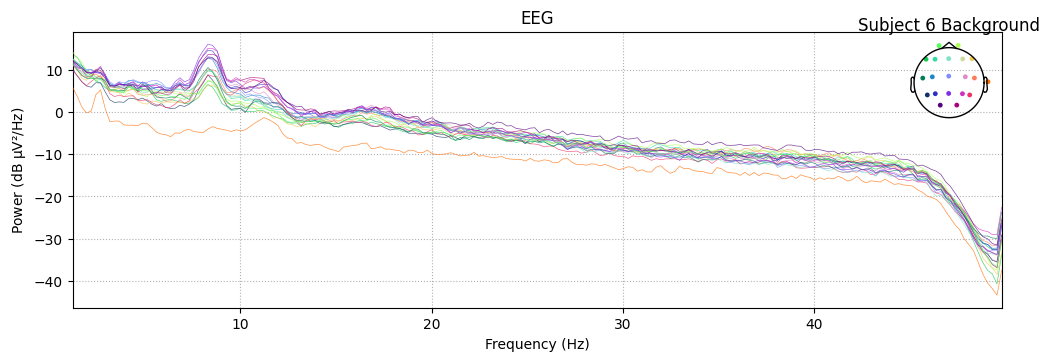

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


c:\Users\Wise\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


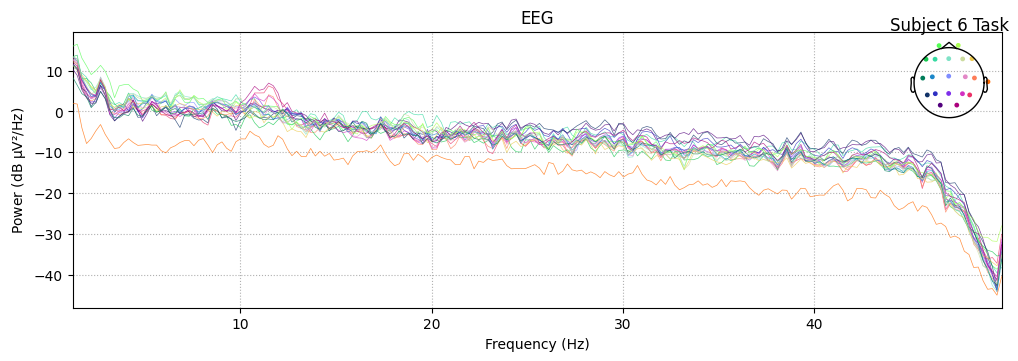

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


c:\Users\Wise\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


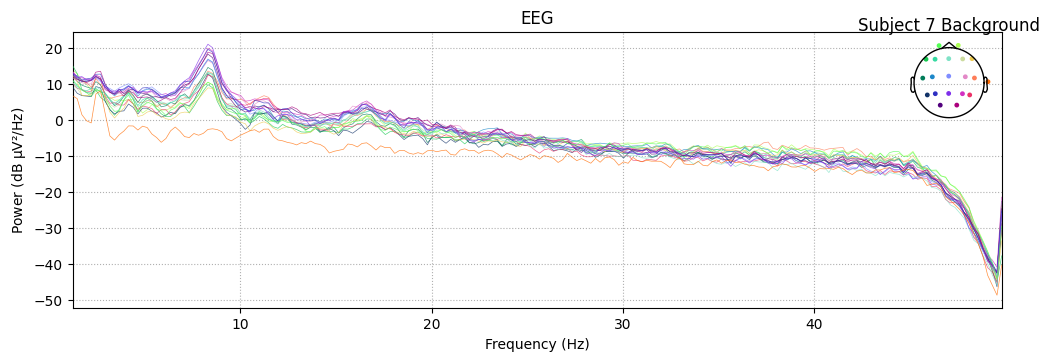

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


c:\Users\Wise\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


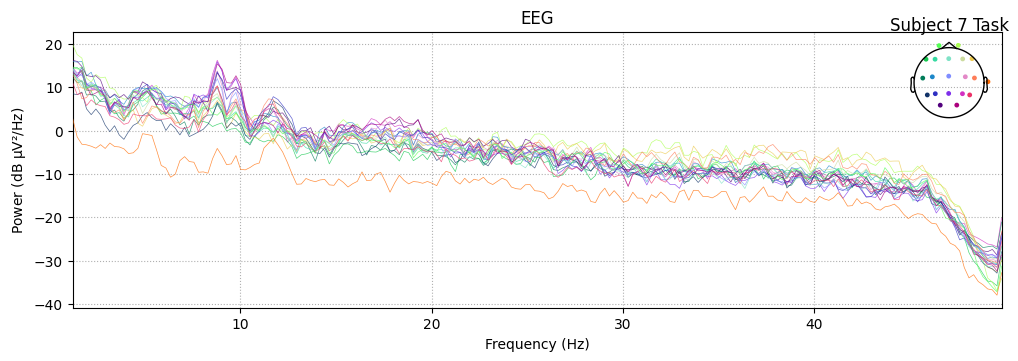

In [19]:
# Plot Subject 6 Background
# raws[0].filter(1., 50.)
raws[0].plot_psd(fmin=1, fmax=50)
plt.title('Subject 6 Background')
plt.show()

# Plot Subject 6 Task 
raws[1].plot_psd(fmin=1, fmax=50)
plt.title('Subject 6 Task')
plt.show()

# Plot Subject 7 Background
raws[2].plot_psd(fmin=1, fmax=50)
plt.title('Subject 7 Background')
plt.show()

# Plot Subject 7 Task 
raws[3].plot_psd(fmin=1, fmax=50)
plt.title('Subject 7 Task')
plt.show()


# Q2)
## Plot the spectrogram for the two conditions (background and task). Discuss the main differences between the two groups.

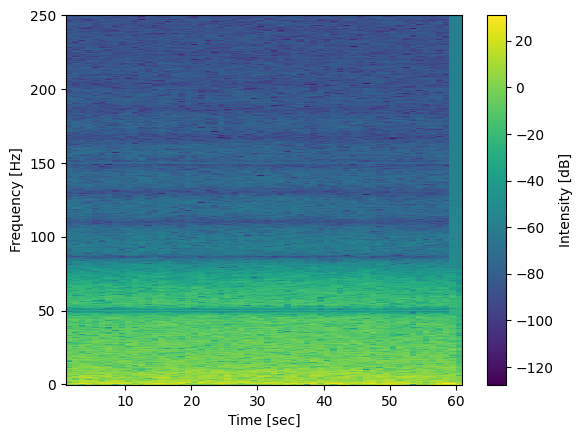

In [37]:
# Get the data from the raw object
# eeg_data = raw_obj.get_data()  # Shape is (n_channels, n_times)
# sfreq = raw_obj.info['sfreq']  # Sampling frequency
# print(raw)
eeg_data = raws[3].get_data()  # Shape is (n_channels, n_times)
sfreq = raws[3].info['sfreq']  # Sampling frequency

# Compute spectrogram for the first channel (e.g., Fz)
# channel_idx = 20  # Index for Fz (first channel in the picks)
# f, t, Sxx = sp.signal.spectrogram(eeg_data[channel_idx], fs=sfreq, window=('hann'),
f, t, Sxx = sp.signal.spectrogram(eeg_data[0], fs=sfreq, window=('hann'),
                                  nperseg=1500, noverlap=1000, scaling='density', mode='psd')

plt.pcolormesh(t, f, 10*np.log10(Sxx*1e6**2), cmap='viridis')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar().set_label('Intensity [dB]')
plt.show()

# Q3)
## Plot the time domain signal in Alpha band (8-12 Hz) for the two conditions (background and task). Discuss the main differences between the two groups.

# Q4)
## Plot the topomap of average power spectral density in the alpha band (8-12 Hz) for the two conditions (background and task). Discuss the differences between the two conditions.